# **HATE SPEECH DETECTION**
This project aims at being able to detect hate speech without it being done by human readers.

# **BENEFITS FOR THE COMPANY**

Hate speech is very harmful and can cause serious impacts on an individual or community.Hate speech as also been know to cause or increase violence,discrimination and social marginalization.Given that In this day and age, most people spend many hours a day on the internet,our primary goal will be to ensure that we can have a way to detect hate speech on the internet automatically since it is impossible to hire enough people to read through comments and posts on the internet.Creating an automatic way to detect hate speech can help an internet platform improve their users reputaion by identifying and erasing all speech on their platform that could ruin their brand.Automatic hate speech detection also has additional advantages such enhancing the users experience and reducing the legal liability for the company.

# **DATA COLLECTION**

The collection of data was done by harning social media data from tweets, posts and comments.
https://www.kaggle.com/datasets/waalbannyantudre/hate-speech-detection-curated-dataset/code

# **MACHINE LEARNING PROBLEM**

Machine learning is a branch of artificial intelligence that develops and uses algorothms to learn from data and make preditions on similar data based on insights they previously learned. The task of hate speech detection is a binary classification problem with the goal of classifying text as either hate speech or non hate speech.

IMPORTING RELEVANT LIBRARIES

In [ ]:
!pip install textacy
# Install kaggle
! pip install kaggle

In [ ]:
# Make the kaggle directory
! mkdir ~/.kaggle

In [ ]:
# Copy kaggle json file into the kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# Assign appropriate privilages to the json file
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the Hate Speech dataset
! kaggle datasets download -d waalbannyantudre/hate-speech-detection-curated-dataset

In [ ]:
# unzip dataset
! unzip hate-speech-detection-curated-dataset.zip

In [ ]:
import pandas as pd

import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display                                   import display
from sklearn.decomposition                             import PCA

from sklearn.feature_extraction.text                   import TfidfVectorizer
from sklearn.preprocessing                             import StandardScaler, RobustScaler , MaxAbsScaler,MinMaxScaler
from sklearn.model_selection                           import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model                              import LogisticRegression
from sklearn.tree                                      import DecisionTreeClassifier
from sklearn.ensemble                                  import GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis                     import LinearDiscriminantAnalysis
from sklearn.svm                                       import SVC
from sklearn.naive_bayes                               import GaussianNB
from sklearn.neighbors                                 import KNeighborsClassifier
from sklearn.metrics                                   import accuracy_score, label_ranking_average_precision_score,f1_score,roc_auc_score,make_scorer
from sklearn.metrics                                   import classification_report
from imblearn.over_sampling                            import SMOTE,ADASYN
from imblearn.under_sampling                           import EditedNearestNeighbours, ClusterCentroids, RandomUnderSampler
from imblearn.combine                                  import SMOTEENN, SMOTETomek
from imblearn.metrics                                  import geometric_mean_score, make_index_balanced_accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import warnings
warnings.filterwarnings('ignore')


**DATA PREPROCESSING**

LOADING THE DATASET

we load the dataset csv file using pandas and cut down the large dataset to only 10 000 entries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/HateSpeechDataset.csv", encoding='latin1')
# Assuming df is your DataFrame
data = df.sample(n=10000, random_state=42)  # Set random_state for reproducibility
data.head()

,Content,Label,Content_int
180567,unblock because i said so,0,"[146715, 24245, 122, 80, 155, 97, 146714]"
67111,well unfortunately he cannot eat pork as he is...,1,"[146715, 177, 2097, 191, 655, 280, 3446, 273, ..."
150382,jeezus i will have to whip out the checkbook w...,0,"[146715, 37315, 80, 75, 87, 7, 7585, 294, 3, 4..."
317494,this morning what a slut the best morning friends,0,"[146715, 19, 370, 56, 24, 57, 3, 584, 370, 190..."
91983,look if you are so tired take a nap i really d...,0,"[146715, 618, 204, 26, 154, 97, 1412, 252, 24,..."


Check the number of rows and columns, then visualize the distribution and description statistics of the target column "Label" in the dataframe named data

In [ ]:
print("shape: ", data.shape, "\n")
print(data.Label.value_counts(), '\n\n', data.Label.describe(), "\n")


shape:  (10000, 3) 

0    8157
1    1843
Name: Label, dtype: int64 

 count     10000
unique        2
top           0
freq       8157
Name: Label, dtype: object 



Check the fields in the dataset and their data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 180567 to 157618
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Content      10000 non-null  object
 1   Label        10000 non-null  object
 2   Content_int  10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


CHECKING FOR MISSING VALUES

In [ ]:
# Check for missing values in the 'data' DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
Content        0
Label          0
Content_int    0
dtype: int64


we have no no missing values in our dataset.

**DATA EXPLORATION**

CHECKING IF TH DATA IS BALANCED

We check the data to seen if it has a balaanced distribution between the two claasifiaction in the target label.An imbalance in the data can lead to a bias in the model training that leads the model to be more inclined to predict the majority class most of the time as the model becomes less sensetive to the minority class. We make sure the dataset has an imbalance of less than 1 percent.

Number of each class of the target label:
0    8157
1    1843
Name: Label, dtype: int64
Percentage of the positive class: 18.43 %


<Axes: xlabel='None'>

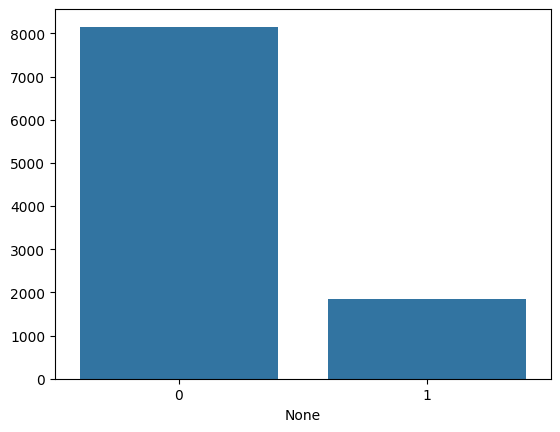

In [ ]:


# Assuming 'Label' is the correct column name in your DataFrame
target_count = data['Label'].value_counts()

# Display the count of each class in the target label
print('Number of each class of the target label:')
print(target_count)

# Calculate the percentage of the positive class
positive_percentage = 100 * round(target_count[1] / (target_count[0] + target_count[1]), 4)
print('Percentage of the positive class:', positive_percentage, '%')

# Visualize the distribution using a bar plot
sns.barplot(x=target_count.index, y=target_count.values)


the dataset is highy imbanced with the positive set only being 18.43% in the dataset

TEXT PREPROCESSING

In [ ]:
# We check a sample tweet to see if it contains hashtags and special characters and/or wide spaces
df.loc[1]['Content']

'just by being able to tweet this insufferable bullshit proves trump a nazi you vagina'

As we can observe the Content has no such characters

**Removing short words from the Content of the dataframe.**
hort words like "a," "the," "and," "of," etc. (often called stop words) frequently occur in text but usually carry less meaning than longer, more content-rich words.
Removing them can reduce noise and focus the analysis on more informative words, potentially improving model performance.
f every unique word becomes a feature in a machine learning model, having many short, common words can create a very sparse feature matrix (mostly zeros), leading to computational challenges and less effective models.
Removing them can create a denser, more manageable feature space.

In [ ]:
# Removing them can reduce noise and focus the analysis on more informative words,
# potentially improving model performance.

data['Content'] = data['Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
data.head()


,Content,Label,Content_int
180567,unblock because said,0,"[146715, 24245, 122, 80, 155, 97, 146714]"
67111,well unfortunately cannot eat pork kike think ...,1,"[146715, 177, 2097, 191, 655, 280, 3446, 273, ..."
150382,jeezus will have whip out the checkbook with t...,0,"[146715, 37315, 80, 75, 87, 7, 7585, 294, 3, 4..."
317494,this morning what slut the best morning friends,0,"[146715, 19, 370, 56, 24, 57, 3, 584, 370, 190..."
91983,look you are tired take nap really not care ho...,0,"[146715, 618, 204, 26, 154, 97, 1412, 252, 24,..."


**Tokenizing**
Tokenizing is the process
**Stemming**
Stemming is the process of reducing words to the their root form. an example of which would be walking reduced to walk,or runing to run.

In [ ]:

# Download the 'punkt' tokenizer models
nltk.download('punkt')

# Assuming 'data' is a DataFrame containing text data
# You should import or define 'data' before using it in the code

# Initialize SnowballStemmer
snowball = SnowballStemmer('english')

# Define the preprocessor function
def preprocessor(input_text):
    tokenized_text = nltk.word_tokenize(input_text, language='english')
    stems = [snowball.stem(t) for t in tokenized_text]
    return " ".join(stems)

# Assuming 'data' is a DataFrame with a 'Content' column
data['Content'] = data['Content'].apply(preprocessor)

# Debugging: Check if the preprocessed data is empty or trivial
print("\n Sample preprocessed data:", data.head(10), "\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



 Sample preprocessed data:                                                   Content Label  \
180567                                unblock becaus said     0   
67111   well unfortun can not eat pork kike think you ...     1   
150382  jeezus will have whip out the checkbook with t...     0   
317494           this morn what slut the best morn friend     0   
91983   look you are tire take nap realli not care how...     0   
122018  would not spend penni fix this fuck roof for t...     1   
24740                                               moron     0   
188657  actual forget the request you are all bunch cu...     0   
223130  gardner later wrote deeper articl for skeptic ...     0   
202518  the london eye mysteri you recent ad the londo...     0   

                                              Content_int  
180567          [146715, 24245, 122, 80, 155, 97, 146714]  
67111   [146715, 177, 2097, 191, 655, 280, 3446, 273, ...  
150382  [146715, 37315, 80, 75, 87, 7, 7585, 294, 3, 4

# **TD-IDF**

The Term Frequency-Inverse Document Frequency score is the measure of the importance of a term document relative to its importance a corpus.It can help us identify words and phrases that are an indicator of hate speech .


In [ ]:
# Initialize TfidfVectorizer
tfidf_model = TfidfVectorizer()

# ...

# Fit and transform the preprocessed data
tfidf_matrix = pd.DataFrame(tfidf_model.fit_transform(data['Content']).toarray())
inverted_index = {id: term for term, id in enumerate(tfidf_model.get_feature_names_out())}

# Concatenate the original data with the TF-IDF matrix
result_df = pd.concat([data, tfidf_matrix], axis=1)

# Display the resulting DataFrame
display(result_df.head())

,Content,Label,Content_int,0,1,2,3,4,5,6,...,16621,16622,16623,16624,16625,16626,16627,16628,16629,16630
180567,unblock becaus said,0,"[146715, 24245, 122, 80, 155, 97, 146714]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67111,well unfortun can not eat pork kike think you ...,1,"[146715, 177, 2097, 191, 655, 280, 3446, 273, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150382,jeezus will have whip out the checkbook with t...,0,"[146715, 37315, 80, 75, 87, 7, 7585, 294, 3, 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317494,this morn what slut the best morn friend,0,"[146715, 19, 370, 56, 24, 57, 3, 584, 370, 190...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91983,look you are tire take nap realli not care how...,0,"[146715, 618, 204, 26, 154, 97, 1412, 252, 24,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace fields with NaN values in the dataframe with 0s

In [ ]:
result_df = result_df.fillna(0)

In [ ]:
# drop rows having 0 in the column 'Content'

result_df = result_df[result_df['Content'] != 0]


In [ ]:
# print dataframe to check length
print(result_df['Content'])

180567                                  unblock becaus said
67111     well unfortun can not eat pork kike think you ...
150382    jeezus will have whip out the checkbook with t...
317494             this morn what slut the best morn friend
91983     look you are tire take nap realli not care how...
                                ...                        
183084    dear want briefli thank again for your attent ...
263157    dead user equal dead bot skip while commend yo...
361570    can inform releas under the creativ common att...
195461    can also email your messag the class also your...
157618    do what ani presid doe this day not recal othe...
Name: Content, Length: 10000, dtype: object


**TRAIN/TEST DATASET PREPARATION**
we divide the dataset into x-content and y-label

In [ ]:


X, y = result_df['Content'].values, result_df['Label'].values
#train, test split

In [ ]:
print(X, "\n")
print(y)

['unblock becaus said'
 'well unfortun can not eat pork kike think you are right search for his denomin earlier but came with noth might even more obscur than thought think from madagascar look and most peopl there are protest could weird declin from that not know'
 'jeezus will have whip out the checkbook with the number slip make that desper need your attent onli could send one cornish pastri email recompens you end overweight had send one for everi fix you manag'
 ...
 'can inform releas under the creativ common attribut sharealik licens use wikipedia see haga not could whatev address that the tabl wikipedia copyright leftorium'
 'can also email your messag the class also your last day rush request sound fine sorri did not know about the volunt rush issu model assign after two other longstand instructor assign also request help and talk vari length with nativ foreign jami and kevin gorman also read the educ guid nowher were these volunt issu point out timelin and syllabus what slut 

**TRAIN TEST SPLIT**

we split the dataset into train 50% , test 30% and validation set 20%. We will use the trainset to train our model,validation to check the best model then use the test set to do the prediction.

In [ ]:
# Separate the data into training data and test data
print(f"We will split the dataset into training(0.5), testing(0.3) and validation(0.2)")

# Initial split into 50% training and 50% remaining (train/temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
# Further split remaining set into 60% test and 40% validation (effectively 30/20)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


We will split the dataset into training(0.5), testing(0.3) and validation(0.2)


((5000,), (2000,), (3000,), (5000,), (2000,), (3000,))

In [ ]:
# print the training data and the test data

print(X_train)


['max palestinian muslim friend throw atheist web logger into prison for month for his religi view'
 'and set accept more econom migrant'
 'nope you are wrong when court dismiss the charg that success not mistaken the court doe not publish instanc where they dismiss the charg and that whi appear one has success won against the court'
 ... 'retweet you are not the father what everi mexican nigger love hear'
 'thank you for your effort for one thank you for your effort stick with the rapt page and although lot baseless unpleasantri were focuss you the extremist hindus sure the real hindu brother and sister wikipedia saw through the real genuin effort you display tri resolv this difficult issu the arbitr over and glad the result what slut seen for what was bunch childish bigot not prepar work with other for the better enlighten other our cultur and tradit unfortun think ragout are now seen more quarrel bunch rather than what whatev tri and say whatev are lol fact think this exampl what be

In [ ]:
classes, class_count = np.unique(y_train, return_counts = True)
print(f"total number of training examples : {len(y_train)}")
print(f"total number of classes : {len(classes)}")

total number of training examples : 5000
total number of classes : 2


**Feature Extraction**

Converting the textual data to numerical data

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 10815)	0.19479579905068947
  (0, 8319)	0.27691647654705515
  (0, 4587)	0.1645035466946591
  (0, 6487)	0.24245929923830656
  (0, 3781)	0.19358489911112642
  (0, 7845)	0.2895295891930186
  (0, 5089)	0.1816819413763889
  (0, 5850)	0.34236770699253394
  (0, 10996)	0.24019943254468945
  (0, 636)	0.3306685010314929
  (0, 10102)	0.26521727058601413
  (0, 3885)	0.2073435304350046
  (0, 6600)	0.22407835874753979
  (0, 7248)	0.31417939634260666
  (0, 6142)	0.31417939634260666
  (1, 6326)	0.5179052176550736
  (1, 3115)	0.5134764557837345
  (1, 6499)	0.2718526323691467
  (1, 49)	0.3837730139898191
  (1, 8922)	0.473896542811121
  (1, 370)	0.1495078646768404
  (2, 174)	0.12910633296388205
  (2, 11198)	0.18122276894128456
  (2, 4434)	0.08737276627594784
  (2, 7053)	0.0860384907204362
  :	:
  (4998, 10022)	0.2130110936049651
  (4998, 518)	0.06787540514000646
  (4998, 11350)	0.14033694945771746
  (4998, 6499)	0.05120960559515578
  (4998, 370)	0.19714236723501719
  (4998, 3781)	0.20843430213017197

In [ ]:
print(X_test)

  (0, 11051)	0.13285582162267273
  (0, 11048)	0.1978478544291557
  (0, 10421)	0.15945041713991598
  (0, 10077)	0.08340095036874891
  (0, 10034)	0.1362984050012362
  (0, 10022)	0.05703011578722909
  (0, 7088)	0.22601070682244054
  (0, 7082)	0.1768582091222033
  (0, 7007)	0.21070084446135556
  (0, 7006)	0.4623333173296929
  (0, 6895)	0.07031514121576994
  (0, 6710)	0.22601070682244054
  (0, 6290)	0.4946562424631433
  (0, 6173)	0.14567556713958485
  (0, 4953)	0.3103431731424399
  (0, 2220)	0.17847547658908552
  (0, 2194)	0.1764652511781831
  (0, 751)	0.15601093211128877
  (0, 564)	0.10372555993295404
  (0, 446)	0.17931288210541443
  (1, 11271)	0.15985731624802055
  (1, 10077)	0.15307231516607236
  (1, 10072)	0.11191716976826124
  (1, 10063)	0.2552257267656026
  (1, 10022)	0.052335925544869086
  :	:
  (2998, 6915)	0.08377588570629671
  (2998, 6600)	0.11767718620473837
  (2998, 6490)	0.2696971851595111
  (2998, 5681)	0.07424093633500423
  (2998, 5646)	0.18021625577042064
  (2998, 5475)	0.25

**MODEL COMPARISON AND SELECTION**

We train graditentboostingclassifier,Random forestvClassifier,logistic regression classifier and decisionTreeClassifier and compare their results to see which model perfomed best on the validation

In [ ]:
# function to apply model on product_score using arg clf_class and **kwargs
# function to apply model on product_score using arg clf_class and **kwargs
# Prepare up-sampled data for the imabalanced dataset
X_res, y_res = SMOTE().fit_resample(X_train, y_train)
X_res2, y_res2 = ADASYN().fit_resample(X_train, y_train)

def product_score(y_true, y_pred):
    return(geometric_mean_score(y_true, y_pred) * accuracy_score(y_true, y_pred) *f1_score(y_true, y_pred, pos_label='1')) ** (1. / 3)


def evaluate_model(clf_class, **kwargs):
  clf = clf_class(**kwargs)
  print(clf_class)
  print('--------------------------------------------------------------------')

  clf.fit(X_train, y_train)
  pred = clf.predict(X_val)
  gmean = geometric_mean_score(y_val, pred)
  acc = accuracy_score(y_val, pred)
  f1 = f1_score(y_val, pred, pos_label='1')
  prod = product_score(y_val, pred)
  print('Imbalanced: ', 'Geometric Mean Score: {:.2f}'.format(gmean), 'Accuracy Score: {:.2f}'.format(acc),  'F1 Score: {:.2f}'.format(f1), 'Product = {:.2f}'.format(gmean, acc, f1, prod))
  print('\n')

  clf.fit(X_res, y_res)
  pred = clf.predict(X_val)
  gmean = geometric_mean_score(y_val, pred)
  acc = accuracy_score(y_val, pred)
  f1 = f1_score(y_val, pred, pos_label='1')
  prod = product_score(y_val, pred)
  print('SMOTE: ', 'Geometric Mean Score: {:.2f}'.format(gmean), 'Accuracy Score: {:.2f}'.format(acc),  'F1 Score: {:.2f}'.format(f1), 'Product = {:.2f}'.format(gmean, acc, f1, prod))
  print('\n')

  clf.fit(X_res2, y_res2)
  pred = clf.predict(X_val)
  gmean = geometric_mean_score(y_val, pred)
  acc = accuracy_score(y_val, pred)
  f1 = f1_score(y_val, pred, pos_label='1')
  prod = product_score(y_val, pred)
  print('ADASYN: ', 'Geometric Mean Score: {:.2f}'.format(gmean), 'Accuracy Score: {:.2f}'.format(acc),  'F1 Score: {:.2f}'.format(f1), 'Product = {:.2f}'.format(gmean, acc, f1, prod))
  print('\n')

def compare_models():
  evaluate_model(GradientBoostingClassifier)
  evaluate_model(RandomForestClassifier)
  evaluate_model(LogisticRegression)
  evaluate_model(DecisionTreeClassifier)

compare_models()

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
--------------------------------------------------------------------
Imbalanced:  Geometric Mean Score: 0.48 Accuracy Score: 0.84 F1 Score: 0.36 Product = 0.48


SMOTE:  Geometric Mean Score: 0.68 Accuracy Score: 0.83 F1 Score: 0.52 Product = 0.68


ADASYN:  Geometric Mean Score: 0.69 Accuracy Score: 0.82 F1 Score: 0.52 Product = 0.69


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
--------------------------------------------------------------------
Imbalanced:  Geometric Mean Score: 0.39 Accuracy Score: 0.83 F1 Score: 0.26 Product = 0.39


SMOTE:  Geometric Mean Score: 0.55 Accuracy Score: 0.84 F1 Score: 0.42 Product = 0.55


ADASYN:  Geometric Mean Score: 0.58 Accuracy Score: 0.85 F1 Score: 0.45 Product = 0.58


<class 'sklearn.linear_model._logistic.LogisticRegression'>
--------------------------------------------------------------------
Imbalanced:  Geometric Mean Score: 0.43 Accuracy Score: 0.84 F1 Score: 0.30 P


Logistic Regression has the best accuracy score(0.84) and product score (0.79) hence, its the best model for this classification data

**Logistic Regression Model**

**Model Evaluation**

Accuracy score - this will calculate how many predictions have been made by the model.
Once the model completes learning from the train data, it should be able to make prediction, in this case we will start with the content, and the model has to find the target, i.e. whether the content is hate speech (1) or not hate speech (0)


In [ ]:
# Create and train the model
model = LogisticRegression(random_state=42)  # Adjust hyperparameters as needed
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

In [ ]:
# Test performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, pos_label='1'))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.843
F1-score: 0.3124087591240876
AUC-ROC: 0.5912352721772579


The Accuracy score is 0.8453333333333334, which is 84% accurate (when rounded off to the floor ceiling of a percentage). This means that the model can accurately predict the hatefulness of the content with an 84% accuracy, i.e if given 100 data sample, 84 can be accurately classified.

In [ ]:
# Evaluate model performance using accuracy on train data
train_accuracy = model.score(X_train, y_train)
print("Accuracy on train data:", train_accuracy)

Accuracy on train data: 0.8564


The accuracy on trained data is 85.6%. It is expectedly higher than the accuracy on test data.
Compared to the test data, this shows that the model has a high performance because it is in the 80th percentile and has a difference of not so much more than 1% from the train accuracy.

Save trained model

In [ ]:

filename = 'trained_model_1.sav'
pickle.dump(model, open(filename, 'wb'))

**HYPER-PARAMETER OPTIMIZATION**

Hyperparameter optimization is the process of fine-tuning a machine learning model's hyperparameters to achieve the best possible performance on a given task.
In this section we will tune hyperparameters to improve performance

**Grid Search**

Grid search will be used to tune the hyperparameters because it exhaustively tries all combinations within a specified grid.
Both the train set and validation set are over-sample, we will implement grid-search using sklean

In [ ]:


# Create a dictionary specifying values to try for each hyperparameter
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# Create Grid Search Object:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # Use cross-validation

# Perform Grid Search:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)


Best parameters: {'C': 10, 'solver': 'liblinear'}


This will evaluate the perfomance of the best model Evaluate Performance.

In [ ]:
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score  # Import appropriate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, pos_label="1"))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8513333333333334
F1-score: 0.48735632183908045
AUC-ROC: 0.6739044376254253


The following are the values of the chosen performance metric before Hyper-parameter tuning using Grid-Search
------------------------------------
Accuracy: 0.8513333333333334

F1-score: 0.48735632183908045

AUC-ROC: 0.6739044376254253

The following are the value of the same metrics after Hyper-parameter optimization using Grid-search
------------------------------------
Accuracy: 0.8566666666666667
F1-score: 0.491725768321513
AUC-ROC: 0.6765981475892838

As can be observed from the two different sets of metrics, performance increased in Accuracy, F1-score and AUC-ROC

# **SUGGESTED PREDICTIVE MODEL**

Using the best feature transformations, classification model and the hyperparamneters, we will train the model over the sampled dataset

In [ ]:
X_big_res, y_big_res = ADASYN().fit_resample(X_train, y_train)

In [ ]:
model = LogisticRegression(C=10, solver='liblinear')
print('Suggest Predictive Model is: \n')
display(model)

Suggest Predictive Model is: 



LogisticRegression(C=10, solver='liblinear')

In [ ]:
print(X_big_res.shape)

(8241, 11438)


In [ ]:
# Train with ADASYN
model.fit(X_big_res, y_big_res)

pred = model.predict(X_big_res)

print('\n Classification Report \n')
print(classification_report(y_big_res, pred))

print("===================================================")
gmean = geometric_mean_score(y_test, pred)
acc = accuracy_score(y_big_res, pred)
f1 = f1_score(y_big_res, pred, pos_label='1')
prod = product_score(y_big_res, pred)
print('\nG-Mean = {:.2f}    Accuracy = {:.2f}    f1= {:.2f}    Product = {:3f}'.format(gmean, acc, f1, prod))
print("===================================================")



 Classification Report 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4048
           1       0.98      1.00      0.99      4193

    accuracy                           0.99      8241
   macro avg       0.99      0.99      0.99      8241
weighted avg       0.99      0.99      0.99      8241


G-Mean = 0.00    Accuracy = 0.99    f1= 0.99    Product = 0.986203


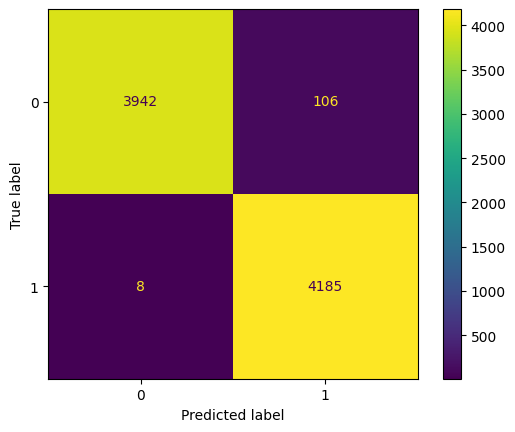

In [ ]:
cm = confusion_matrix(y_big_res, pred)
ConfusionMatrixDisplay(cm).plot()
#plt.show()

FEATURE IMPORTANCE ANALYSIS

Feature importance analysis is a technique used in machine learning to understand how much each feature in your data contributes to the model's predictions. It helps you identify the most influential features that drive the model's decisions and helps you prioritize your efforts when exploring your data and optimizing your model.

**Feature Importance for Logistic Regression**

Logistic regression does not have an attribute for ranking feature. So to visualize the importance we have to use coefficients that we can use to show feature importance.
In this case, we assume bigger coefficents have more contribution to the model considering the features have the THE SAME SCALE, otherwise the assumption is not correct.
Also, we note that some coefficients can be negative and we might have to convert them to positive (even though negative coefficients might suggest a negative relationship).
We also note that coefficients reflect linear relationships and might not capture complex feature interactions.

<Axes: title={'center': 'Feature Importance Analysis'}>

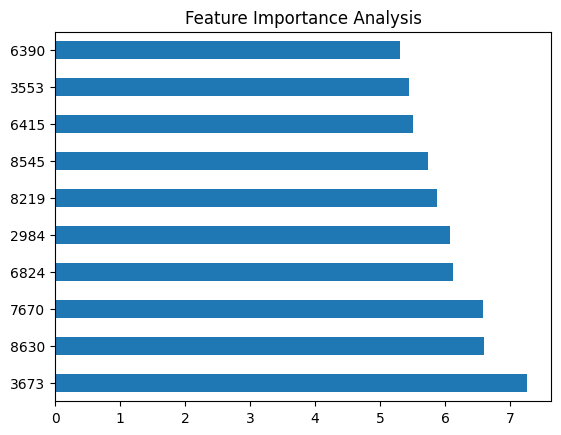

In [ ]:
# Extract feature importances
importance = model.coef_[0]
# importance is a list so you can plot it
feat_importances = pd.Series(importance)
feat_importances.nlargest(10).plot(kind='barh', title='Feature Importance Analysis')

In [ ]:
absolute_coefficeints = np.abs(model.coef_[0])
most_influencial_feature_index = np.argmax(absolute_coefficeints)
print(most_influencial_feature_index)

3673


# **CONCLUSION**

The Hatespeech detction project was designed to try and address the issue of hate speech on online platforms by using machine learning techniques and NLP. My aimm was to create a way to automaticaaly indetify and categorize hate speech on social meadia.The success of this project hold significance to online platforms since it automatically identifies and address hate instances of hate speech on online plateforms, which could lead to the creation of a safer and much more inclusive platforms for users.The current model did show very good results but i would use larger dataset and explore more advanced techniques like deep learning models for nuanced hate speech detection which would increase my results even more.

Convert Colab notebook to html file

In [122]:
!jupyter nbconvert /content/drive/MyDrive/Colab\ Notebooks/sentimental_analysis.ipynb --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/sentimental_analysis.ipynb to html
[NbConvertApp] Writing 791256 bytes to /content/drive/MyDrive/Colab Notebooks/sentimental_analysis.html
